In [1]:
from parzen_window import *
from data_processing import standardise

### 1. Import training data

In [2]:
pho_EGFR = pd.read_csv('data/pho.EGFR.csv', index_col = 0)
pho_EGFR.insert(1, 'min_000', np.zeros(pho_EGFR.shape[0]))
pho_EGFR.iloc[:, 1:6] = standardise(pho_EGFR.iloc[:, 1:6].to_numpy())
pho_EGFR

,cl,min_000,min_001,min_008,min_040,min_090,ligand
id,,,,,,,
Q8IZP0-10-Y213,5.0,-0.956906,1.887954,-0.066774,-0.165662,-0.698612,EGF
Q13085-S25,1.0,-1.060578,-0.676132,0.569899,1.681702,-0.514891,EGF
Q13085-S5,1.0,-1.474684,-0.880179,1.121970,0.742471,0.490421,EGF
P53396-S455,2.0,-1.513064,-0.378643,-0.174675,1.481403,0.584980,EGF
O43707-S140,3.0,1.900691,-0.934917,-0.687509,-0.170109,-0.108156,EGF
...,...,...,...,...,...,...,...
C9J0I9-S359,6.0,0.904833,0.350893,1.075560,-0.862432,-1.468854,TGFalfa
C9J0I9-S370,4.0,0.005890,0.513938,0.894066,0.504856,-1.918750,TGFalfa
Q96KR1-S1054,1.0,-1.280895,-1.033385,0.289994,1.293623,0.730662,TGFalfa


### 2. Calculate the standard deviation for each dimension

In [3]:
X = np.hstack((pho_EGFR.iloc[:, 1:6].to_numpy(), np.atleast_2d(pho_EGFR.iloc[:, 0].to_numpy()).T))
classes = [1, 2, 3, 4, 5, 6]
bws = np.std(X[:, :-1], axis = 0)
bws

array([1.02167342, 0.90370037, 0.97545242, 0.9183889 , 0.87927198])

### 3. Run leave-one-out cross-validation

In [4]:
pred_cl, pred_prob = loo_cv(X, classes, bws)

Time elapsed: 0.0017311573028564453: validate data point [0] ==============> predicted: 5 actual: 5.0 maxProb: 0.015109542183530054
Time elapsed: 0.0020279884338378906: validate data point [1] ==============> predicted: 1 actual: 1.0 maxProb: 0.010105501513336824
Time elapsed: 0.0012059211730957031: validate data point [2] ==============> predicted: 1 actual: 1.0 maxProb: 0.021171321143129463
Time elapsed: 0.0009338855743408203: validate data point [3] ==============> predicted: 2 actual: 2.0 maxProb: 0.015608429905966309
Time elapsed: 0.0012059211730957031: validate data point [4] ==============> predicted: 3 actual: 3.0 maxProb: 0.009507835018148664
Time elapsed: 0.0008611679077148438: validate data point [5] ==============> predicted: 2 actual: 2.0 maxProb: 0.007618165807282377
Time elapsed: 0.0011570453643798828: validate data point [6] ==============> predicted: 4 actual: 4.0 maxProb: 0.014683198328362323
Time elapsed: 0.0008718967437744141: validate data point [7] ==============>

Time elapsed: 0.0015811920166015625: validate data point [178] ==============> predicted: 6 actual: 6.0 maxProb: 0.011260688976177232
Time elapsed: 0.0007421970367431641: validate data point [179] ==============> predicted: 3 actual: 3.0 maxProb: 0.010766341781759085
Time elapsed: 0.0009920597076416016: validate data point [180] ==============> predicted: 3 actual: 3.0 maxProb: 0.015324691836074641
Time elapsed: 0.0011229515075683594: validate data point [181] ==============> predicted: 1 actual: 1.0 maxProb: 0.0189844979681354
Time elapsed: 0.0013298988342285156: validate data point [182] ==============> predicted: 1 actual: 1.0 maxProb: 0.015792344881428208
Time elapsed: 0.0010018348693847656: validate data point [183] ==============> predicted: 1 actual: 1.0 maxProb: 0.015792344881428208
Time elapsed: 0.001065969467163086: validate data point [184] ==============> predicted: 5 actual: 5.0 maxProb: 0.013100304688129243
Time elapsed: 0.0009870529174804688: validate data point [185] ==

Time elapsed: 0.0008780956268310547: validate data point [355] ==============> predicted: 2 actual: 2.0 maxProb: 0.00943142244314006
Time elapsed: 0.0013720989227294922: validate data point [356] ==============> predicted: 2 actual: 2.0 maxProb: 0.01334871691729309
Time elapsed: 0.0012166500091552734: validate data point [357] ==============> predicted: 4 actual: 4.0 maxProb: 0.01831644867627855
Time elapsed: 0.0009360313415527344: validate data point [358] ==============> predicted: 1 actual: 2.0 maxProb: 0.017855499069458904
Time elapsed: 0.0009102821350097656: validate data point [359] ==============> predicted: 1 actual: 2.0 maxProb: 0.007738302702488482
Time elapsed: 0.0010707378387451172: validate data point [360] ==============> predicted: 2 actual: 2.0 maxProb: 0.01804200961072867
Time elapsed: 0.0007801055908203125: validate data point [361] ==============> predicted: 4 actual: 4.0 maxProb: 0.01767848996454305
Time elapsed: 0.0008139610290527344: validate data point [362] ====

Time elapsed: 0.0019178390502929688: validate data point [542] ==============> predicted: 5 actual: 5.0 maxProb: 0.016847167437219607
Time elapsed: 0.0016489028930664062: validate data point [543] ==============> predicted: 3 actual: 3.0 maxProb: 0.007650575686016268
Time elapsed: 0.0009238719940185547: validate data point [544] ==============> predicted: 3 actual: 3.0 maxProb: 0.010562318464627874
Time elapsed: 0.0009009838104248047: validate data point [545] ==============> predicted: 3 actual: 3.0 maxProb: 0.00869542386381965
Time elapsed: 0.001001119613647461: validate data point [546] ==============> predicted: 5 actual: 5.0 maxProb: 0.011646773404971692
Time elapsed: 0.0008640289306640625: validate data point [547] ==============> predicted: 6 actual: 6.0 maxProb: 0.007312185862824001
Time elapsed: 0.0009129047393798828: validate data point [548] ==============> predicted: 3 actual: 3.0 maxProb: 0.008149651554997757
Time elapsed: 0.000843048095703125: validate data point [549] ==

### 4. Plot the confusion matrix

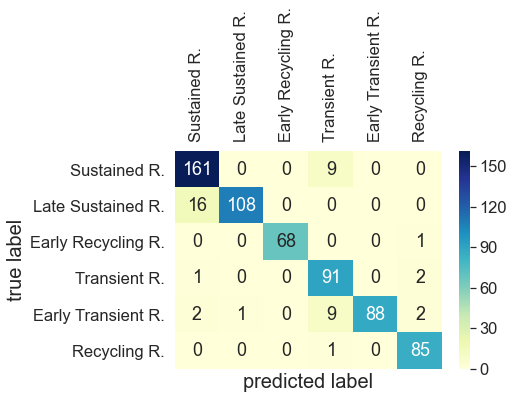

In [5]:
label_dict_orig = {
    1: 'Sustained R.',
    2: 'Late Sustained R.',
    3: 'Early Recycling R.',
    4: 'Transient R.',
    5: 'Early Transient R.',
    6: 'Recycling R.'
}

pho_EGFR['membership'] = pred_prob
pho_EGFR['pred.cl'] = pred_cl
pho_EGFR['label'] = [label_dict_orig[k] for k in pred_cl]

predict_labels = [label_dict_orig[k] for k in pred_cl]
true_labels = [label_dict_orig[k] for k in pho_EGFR['cl']]
labels = list(label_dict_orig.values())
cm = plot_confusion_matrix(true_labels,predict_labels , labels)

### 5. Build the model and predict for the new data

In [6]:
kdes = calc_kdes(X, classes, bw_method = bws)
nd = pd.read_csv('./data/all4cons_cp.csv', index_col = 0)

pred_cl = []
pred_prob = []

for row in nd.iloc[:, :5].to_numpy():
    prob, cl, u = predict_pdf(kdes, row, classes)
    pred_cl.append(cl)
    pred_prob.append(prob)

nd['pred.cl'] = pred_cl
nd['membership'] = pred_prob
nd['label'] = [label_dict_orig[k] for k in nd['pred.cl']]
nd

,0`,1`,8`,40`,120`,condition,pred.cl,membership,label
id,,,,,,,,,
13-S149,-1.197224,-0.458510,1.114498,1.262548,-0.721311,EGF_lo,4,0.011641,Transient R.
66-S107,-1.555665,-0.799337,0.634579,1.031021,0.689402,EGF_lo,1,0.022252,Sustained R.
166-S118,-1.203392,-1.165348,1.010700,1.032689,0.325351,EGF_lo,1,0.019055,Sustained R.
175-S101,-1.184293,-1.251923,0.751342,0.690415,0.994460,EGF_lo,1,0.019638,Sustained R.
252-S987,-1.220865,-1.190442,1.059288,0.843744,0.508275,EGF_lo,1,0.019809,Sustained R.
...,...,...,...,...,...,...,...,...,...
10013-T433,-1.048408,1.757563,0.406781,-0.666791,-0.449146,FGF_hi,5,0.016162,Early Transient R.
10122-T1003,-0.280971,1.985878,-0.590784,-0.495080,-0.619042,FGF_hi,5,0.010278,Early Transient R.
10144-T866,0.254547,1.144664,0.076041,0.387315,-1.862567,FGF_hi,6,0.007774,Recycling R.


### 6. Plot classification results

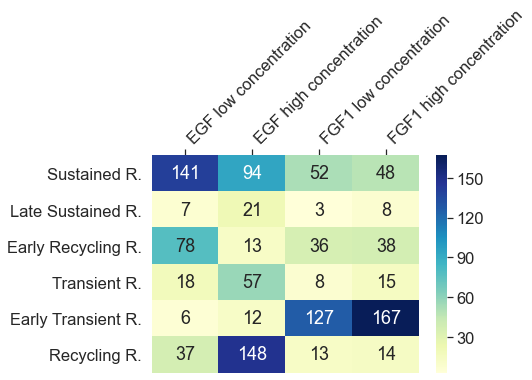

In [7]:
conditions = ['EGF_lo', 'EGF_hi', 'FGF_lo', 'FGF_hi']
titles = ['EGF low concentration', 'EGF high concentration', 'FGF1 low concentration', 'FGF1 high concentration']

plot_class_result(nd, 'pred.cl', conditions, titles, label_dict_orig)

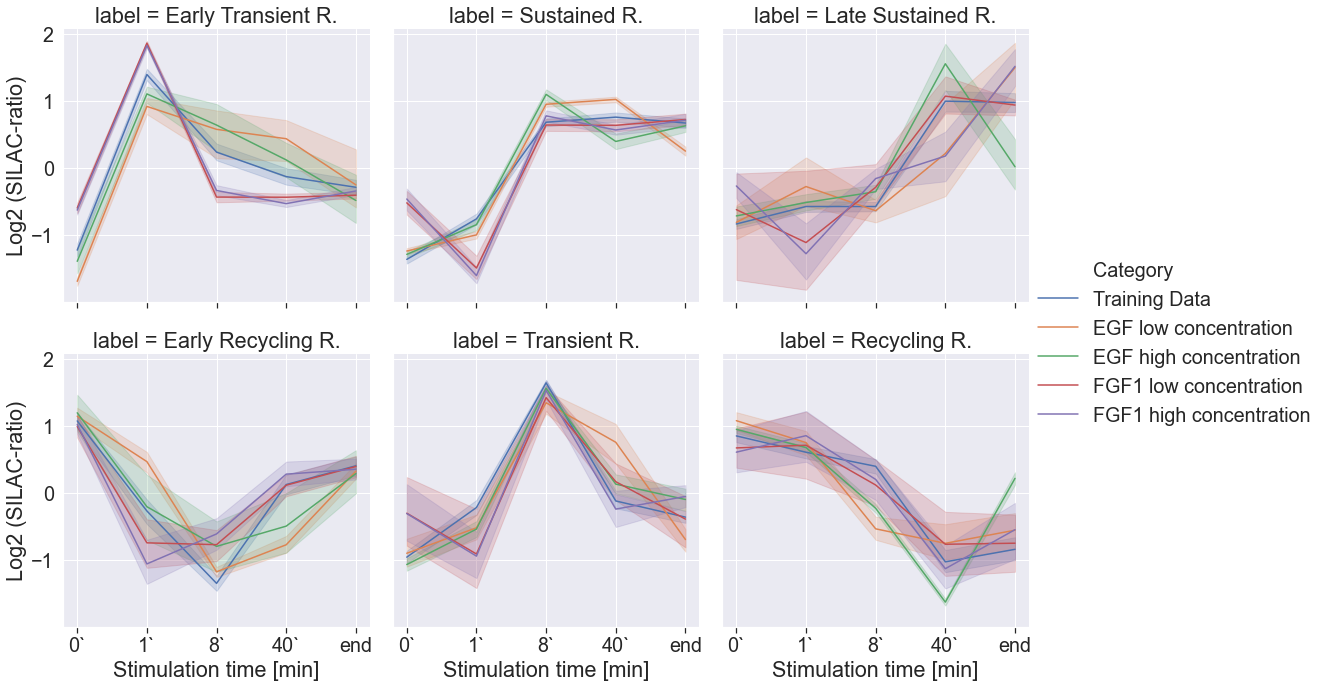

In [8]:
ax = plot_trends(pho_EGFR, nd, conditions, titles)
ax.set_xticklabels(['', '0`', '1`', '8`', '40`', 'end'])